# House Price Prediction

![Enlisted Houses](resources/Enlisted_Housing%2C_Fort_Belvior.jpg)

---

* Dataset includes house sale prices for King County in USA. 
* Homes that are sold in the time period: May, 2014 and May, 2015.
* Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction
* Columns:

1. ida: notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/House
6. sqft_living: square footage of the home
7. sqft_lot: square footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. grade: overall grade given to the housing unit, based on King County grading system
13. sqft_abovesquare: footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) 
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)


## Library Imports

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f"Using Tensorflow Version as - {tf.__version__}")

Using Tensorflow Version as - 2.9.1


In [7]:
# Verify GPU availability and Usage

# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


## Load Dataset

In [3]:
housing = pd.read_csv('resources/kc_house_data.csv')

# Check the data load
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
# Check the data structure
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [16]:
# Check for presence of missing values
sum(housing.isna().sum())

0

In [17]:
# Check the summary statistics
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Some Sample Data Visualizations

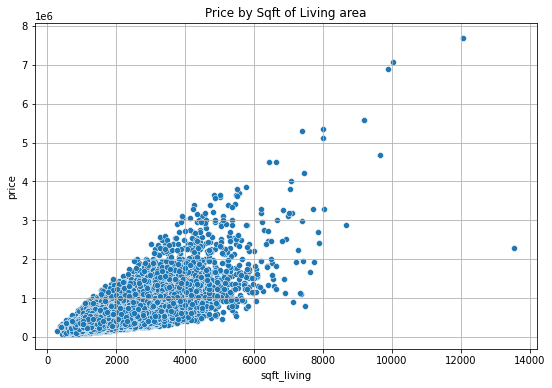

In [19]:
# Some visualizations
plt.figure(figsize=(9, 6))
sns.scatterplot(x='sqft_living', y='price', data=housing)
plt.grid()
plt.title("Price by Sqft of Living area")
plt.grid(True)

<AxesSubplot:>

<Figure size 648x432 with 0 Axes>

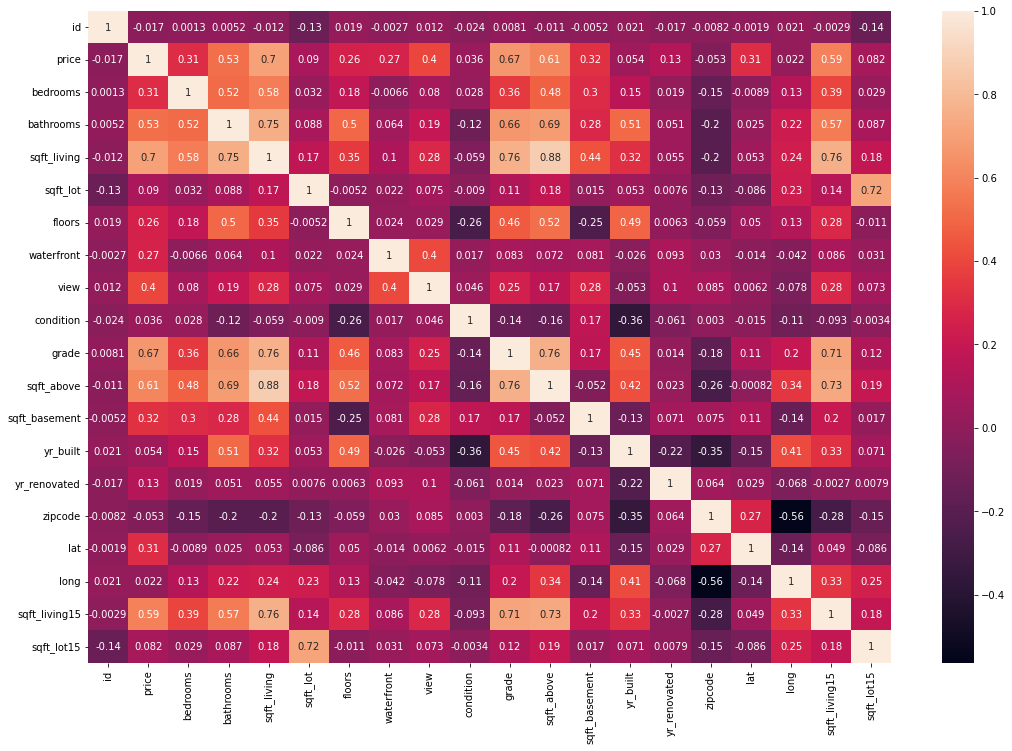

In [21]:
# Lets see the correlations amongst variables
plt.figure(figsize=(9, 6))
f, ax = plt.subplots(figsize = (18, 12))
sns.heatmap(housing.corr(), annot=True)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

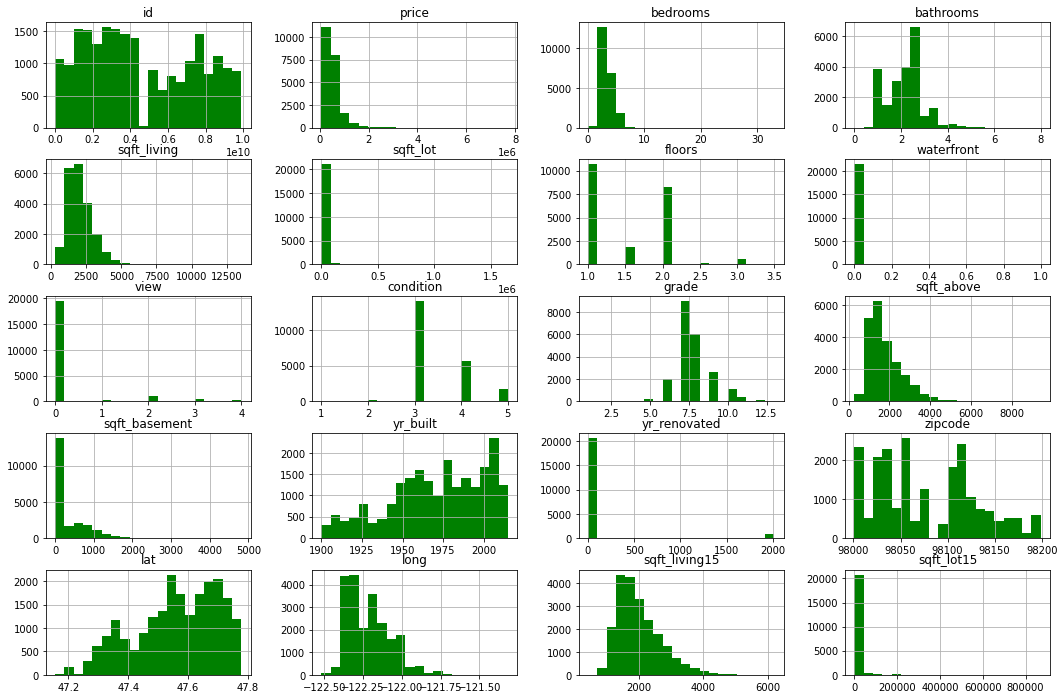

In [22]:
# Let's plot the histogram of the data
housing.hist(bins=20, figsize=(18, 12), color='g')

## Data Preparation

In [23]:
# Check the columns of the dataframe
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
# We will not be using the following attributes in modelling
housing = housing.drop(labels=['id','date','zipcode'], axis=1)
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [26]:
# Extact the features and target
X = housing.drop(labels=['price'], axis=1).values
y = housing['price'].values

# Check the shapr of the features
print(f"Shape of features - {X.shape}")
print(f"Shape of target - {y.shape}")

Shape of features - (21613, 17)
Shape of target - (21613,)


In [31]:
# We will perform scaling across features and target variables
scaler = MinMaxScaler()

# Reshape the target attribute to proper format
y = y.reshape(-1, 1) # This is needed before scaling is called or before being fed to neural network

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

## Training and Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Build and Train the Model

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu, input_shape=(X_train.shape[1], )))
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.linear))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError())

# Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Training the model
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
277/277 [==============================] - 2s 4ms/step - loss: 0.0032 - val_loss: 7.4458e-04
Epoch 2/100
277/277 [==============================] - 1s 4ms/step - loss: 7.9215e-04 - val_loss: 5.8770e-04
Epoch 3/100
277/277 [==============================] - 1s 3ms/step - loss: 6.5183e-04 - val_loss: 5.7704e-04
Epoch 4/100
277/277 [==============================] - 1s 4ms/step - loss: 5.9452e-04 - val_loss: 5.1190e-04
Epoch 5/100
277/277 [==============================] - 1s 3ms/step - loss: 5.5501e-04 - val_loss: 5.0410e-04
Epoch 6/100
277/277 [==============================] - 1s 4ms/step - loss: 5.2241e-04 - val_loss: 4.5493e-04
Epoch 7/100
277/277 [==============================] - 1s 3ms/step - loss: 5.0557e-04 - val_loss: 4.8409e-04
Epoch 8/100
277/277 [==============================] - 1s 3ms/step - loss: 4.9145e-04 - val_loss: 4.1017e-04
Epoch 9/100
277/277 [==============================] - 1s 3ms/step - loss: 4.6118e-04 - val_loss: 4.2242e-04
Epoch 10/100
277/277 [=

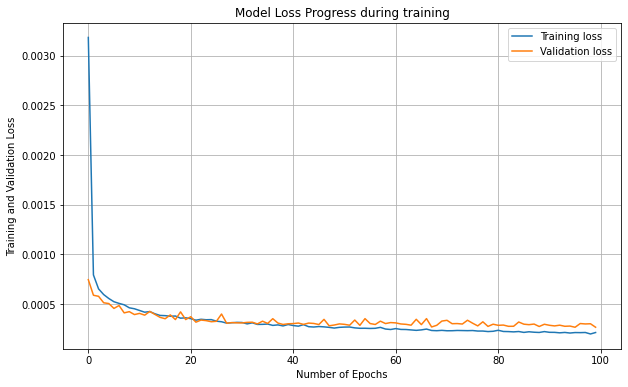

In [38]:
# We will visualize the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Model Loss Progress during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Loss")
plt.legend(['Training loss', 'Validation loss'])
plt.grid(True)

## Run Model Prediction and Regression Metrics

136/136 [==============================] - 0s 2ms/step


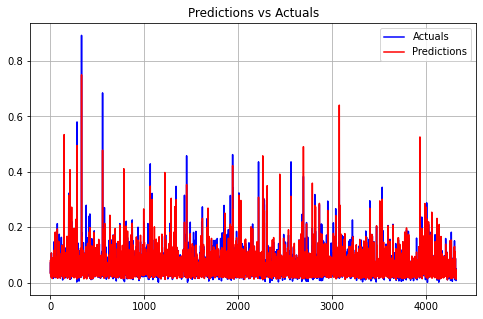

In [39]:
# Lets run the predictions
predictions = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.plot(y_test, color='b')
plt.plot(predictions, color='r')
plt.title('Predictions vs Actuals')
plt.legend(['Actuals', 'Predictions'])
plt.grid(True)

Text(0.5, 1.0, 'Linear Regression Predictions')

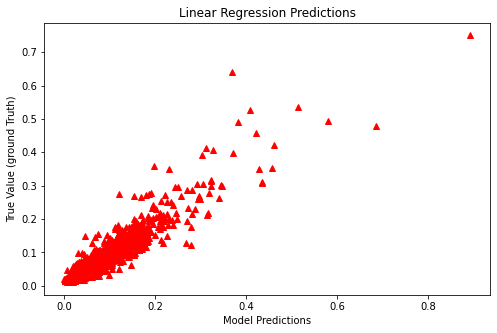

In [41]:
# Visualize actual vs predictions
plt.figure(figsize=(8, 5))
plt.plot(y_test, predictions, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')

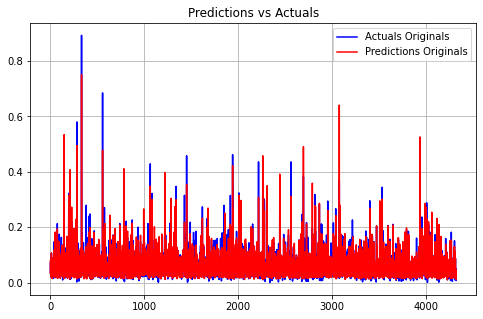

In [42]:
# Now do an inverse scalar transform and plot on the original value
predictions_orig = scaler.inverse_transform(predictions)
y_test_orig = scaler.inverse_transform(y_test)

plt.figure(figsize=(8, 5))
plt.plot(y_test_orig, color='b')
plt.plot(predictions_orig, color='r')
plt.title('Predictions vs Actuals')
plt.legend(['Actuals Originals', 'Predictions Originals'])
plt.grid(True)

In [45]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, predictions_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, predictions_orig)
MAE = mean_absolute_error(y_test_orig, predictions_orig)
r2 = r2_score(y_test_orig, predictions_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.016 
MSE = 0.00027076739913174034 
MAE = 0.009342680254128748 
R2 = 0.8846117658020821 
Adjusted R2 = 0.884156109592706


In [ ]:
"""
How to Run a sample prediction

# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1
"""